# Exercise 2 Data Cleaning
---

### Download Packages 

In [1]:
import pandas as pd
import numpy as np
import shared_utils

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


### Read in our Files

In [2]:
GCS_FILE_PATH = "gs://calitp-analytics-data/data-analyses/bus_service_increase/"
FILE_NAME = "ntd_metrics_2019.csv"
df_metrics = pd.read_csv(f"{GCS_FILE_PATH}{FILE_NAME}")

In [3]:
#preview columns 
list(df_metrics.columns)

['Agency',
 'City',
 'State',
 'Legacy NTD ID',
 'NTD ID',
 'Organization Type',
 'Reporter Type',
 'Primary UZA\n Population',
 'Agency VOMS',
 'Mode',
 'TOS',
 'Mode VOMS',
 'Ratios:',
 'Fare Revenues per Unlinked Passenger Trip ',
 'Fare Revenues per Unlinked Passenger Trip Questionable',
 'Fare Revenues per Total Operating Expense (Recovery Ratio)',
 'Fare Revenues per Total Operating Expense (Recovery Ratio) Questionable',
 'Cost per\n Hour',
 'Cost per Hour Questionable',
 'Passengers per Hour',
 'Passengers per Hour Questionable',
 'Cost per Passenger',
 'Cost per Passenger Questionable',
 'Cost per Passenger Mile',
 'Cost per Passenger Mile Questionable',
 'Source Data:',
 'Fare Revenues Earned',
 'Fare Revenues Earned Questionable',
 'Total Operating Expenses',
 'Total Operating Expenses Questionable',
 'Unlinked Passenger Trips',
 'Unlinked Passenger Trips Questionable',
 'Vehicle Revenue Hours',
 'Vehicle Revenue Hours Questionable',
 'Passenger Miles',
 'Passenger Miles Que

In [4]:
#check out number of rows 
df_metrics.shape

(3685, 45)

In [5]:
#chosing the columns to keep 
df_metrics = df_metrics.iloc[:, [0,1,2,13,15,26]]


In [6]:
df_metrics.head(2)

,Agency,City,State,Fare Revenues per Unlinked Passenger Trip,Fare Revenues per Total Operating Expense (Recovery Ratio),Fare Revenues Earned
0,MTA New York City Transit,New York,NY,$1.34,0.70,"$3,643,213,720"
1,MTA New York City Transit,New York,NY,$6.66,0.32,"$76,398,352"


#### Loading Vehicle dataset

In [7]:
FILE_TWO = "ntd_vehicles_2019.csv"
df_vehicles = pd.read_csv(f"{GCS_FILE_PATH}{FILE_TWO}")

In [8]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 99 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Agency                                                        2775 non-null   object 
 1   City                                                          2775 non-null   object 
 2   State                                                         2775 non-null   object 
 3   Legacy NTD ID                                                 1987 non-null   object 
 4   NTD ID                                                        2775 non-null   object 
 5   Organization Type                                             2775 non-null   object 
 6   Reporter Type                                                 2775 non-null   object 
 7   Primary UZA Population                                        2775 no

In [9]:
df_vehicles = df_vehicles.iloc[:, [0,2,5,6,7,93]]

In [10]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Agency                  2775 non-null   object
 1   State                   2775 non-null   object
 2   Organization Type       2775 non-null   object
 3   Reporter Type           2775 non-null   object
 4   Primary UZA Population  2775 non-null   object
 5   Total Service Vehicles  2775 non-null   object
dtypes: object(6)
memory usage: 130.2+ KB


### Subsetting for only states of interest
<i> Question: how can I filter more efficiently? I tried to create a list to filter everything all at once but I kept getting errors or a list of true/falses<i>

In [11]:
#keeping only the states of interest 
states_to_keep = ["CA", "NY", "TX", "ID", "MS"]
df_vehicles = df_vehicles[df_vehicles.State.isin(states_to_keep)]

In [12]:
#checking that I filtered everything correct 
df_vehicles['State'].unique().tolist()

['NY', 'CA', 'TX', 'ID', 'MS']

### Merging the data with an inner join

<i> Notes: merge1 = pd.merge(df_metrics, df_vehicles, on = "State", how = "left")

merge1.shape </i>

In [13]:
merge1 = df_vehicles.merge(df_metrics, how = "inner", on = ["Agency", "State"])


In [14]:
merge1.State.value_counts()

CA    436
TX    167
NY    128
MS     29
ID     28
Name: State, dtype: int64

In [15]:
merge1.head(2)

,Agency,State,Organization Type,Reporter Type,Primary UZA Population,Total Service Vehicles,City,Fare Revenues per Unlinked Passenger Trip,Fare Revenues per Total Operating Expense (Recovery Ratio),Fare Revenues Earned
0,MTA New York City Transit,NY,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","2,297",New York,$1.34,0.70,"$3,643,213,720"
1,MTA New York City Transit,NY,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","2,297",New York,$6.66,0.32,"$76,398,352"


### Cleaning up the files to remove (), commas, $, and blanks

In [16]:
#removing more columns
merge1 = merge1.drop(['Organization Type', 'Reporter Type'], axis=1)

In [17]:

merge1.columns = merge1.columns.str.strip().str.replace(' ', '_')

In [18]:
merge1.head(2)

,Agency,State,Primary_UZA_Population,Total_Service_Vehicles,City,Fare_Revenues_per_Unlinked_Passenger_Trip,Fare_Revenues_per_Total_Operating_Expense_(Recovery_Ratio),Fare_Revenues_Earned
0,MTA New York City Transit,NY,"18,351,295","2,297",New York,$1.34,0.70,"$3,643,213,720"
1,MTA New York City Transit,NY,"18,351,295","2,297",New York,$6.66,0.32,"$76,398,352"


In [19]:
#dropping na 
merge1 = merge1.dropna()
merge1.dropna(axis='columns').head(1)

,Agency,State,Primary_UZA_Population,Total_Service_Vehicles,City,Fare_Revenues_per_Unlinked_Passenger_Trip,Fare_Revenues_per_Total_Operating_Expense_(Recovery_Ratio),Fare_Revenues_Earned
0,MTA New York City Transit,NY,"18,351,295","2,297",New York,$1.34,0.70,"$3,643,213,720"


In [20]:
#making sure no nulls
print(merge1.isnull().sum().sum())

0


In [21]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788 entries, 0 to 787
Data columns (total 8 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Agency                                                      788 non-null    object
 1   State                                                       788 non-null    object
 2   Primary_UZA_Population                                      788 non-null    object
 3   Total_Service_Vehicles                                      788 non-null    object
 4   City                                                        788 non-null    object
 5   Fare_Revenues_per_Unlinked_Passenger_Trip                   788 non-null    object
 6   Fare_Revenues_per_Total_Operating_Expense_(Recovery_Ratio)  788 non-null    object
 7   Fare_Revenues_Earned                                        788 non-null    object
dtypes: object(8

### HELP: 

<li>I tried to convert the Fare Revenues Recovery Ratio & Unliked Passenger Trip (columns 5 & 6) into the float data type but it gave me an error message. </li>
<li> I tried to replace the (126346) in Fare Revnues all on one line, however I keep getting an error when  I try to convert it into an integer..."invalid literal for int() with base 10: '(126346)'", so I had to do it in a seperate cell below</li>

In [24]:
merge1 = merge1.assign(
    Agency = merge1.Agency.str.strip(),
    Fare_Revenues_per_Unlinked_Passenger_Trip = merge1.Fare_Revenues_per_Unlinked_Passenger_Trip.str.strip().replace({'\$':''}, regex=True),
    City = merge1.City.str.strip(),
    State = merge1.State.str.strip(),
    Total_Service_Vehicles = merge1.Total_Service_Vehicles.str.strip().replace(',','', regex=True),
    Fare_Revenues_Earned = merge1.Fare_Revenues_Earned.str.strip().replace('(126346)', '-126346').replace(',','',regex=True).replace({'\$':''}, regex=True),
    Primary_UZA_Population = merge1.Primary_UZA_Population.str.strip().replace(',','',regex = True)
).astype({
    "Primary_UZA_Population":int,
    "Total_Service_Vehicles":int,
}) 

In [28]:
merge1["Fare_Revenues_Earned"].replace({"(126346)": "-126346"}, inplace=True)
merge1.astype({"Fare_Revenues_Earned": 'int64'}).dtypes

Agency                                                        object
State                                                         object
Primary_UZA_Population                                         int64
Total_Service_Vehicles                                         int64
City                                                          object
Fare_Revenues_per_Unlinked_Passenger_Trip                     object
Fare_Revenues_per_Total_Operating_Expense_(Recovery_Ratio)    object
Fare_Revenues_Earned                                           int64
dtype: object

In [29]:
merge1.head(2)

,Agency,State,Primary_UZA_Population,Total_Service_Vehicles,City,Fare_Revenues_per_Unlinked_Passenger_Trip,Fare_Revenues_per_Total_Operating_Expense_(Recovery_Ratio),Fare_Revenues_Earned
0,MTA New York City Transit,NY,18351295,2297,New York,1.34,0.70,3643213720
1,MTA New York City Transit,NY,18351295,2297,New York,6.66,0.32,76398352


# Analyzing & Plotting
---

#### Random Aggregates HELP
#### Why is the sum something totally crazy??

In [57]:
analysis = merge1.groupby(['State']).agg({'Agency':'count', 'Primary_UZA_Population': 'sum', 
                                                 'Total_Service_Vehicles':'sum','City': 'count',
                                         'Fare_Revenues_Earned': 'median'}).reset_index()
analysis.head()

,State,Agency,Primary_UZA_Population,Total_Service_Vehicles,City,Fare_Revenues_Earned
0,CA,436,1872380671,21260,436,113433.5
1,ID,28,2240334,88,28,7584.5
2,MS,29,1490516,42,29,24614.0
3,NY,128,658118380,16683,128,99040.5
4,TX,167,234448141,9560,167,80518.0


#### Per Capita Total Service Vehicles Measure Across 5 States

In [47]:
per_capita = analysis.assign(Per_Capita_Service_Vehicles = lambda x: (x.Total_Service_Vehicles / x.Primary_UZA_Population)*100000  ).reset_index()
per_capita

,index,State,Agency,Primary_UZA_Population,Total_Service_Vehicles,City,Fare_Revenues_Earned,Per_Capita_Service_Vehicles
0,0,CA,436,1872380671,21260,436,113433.5,1.135453
1,1,ID,28,2240334,88,28,7584.5,3.927986
2,2,MS,29,1490516,42,29,24614.0,2.817816
3,3,NY,128,658118380,16683,128,99040.5,2.534954
4,4,TX,167,234448141,9560,167,80518.0,4.077661


In [42]:
from plotnine import *

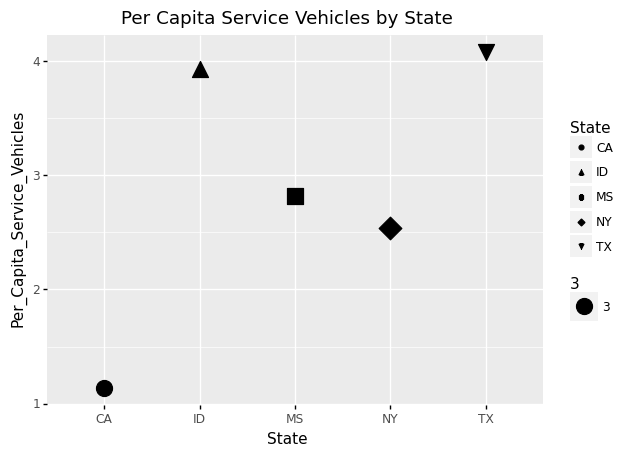

<ggplot: (8766334221803)>

In [87]:
(ggplot(per_capita, aes('State', 'Per_Capita_Service_Vehicles', shape='State', size=3))
 + geom_point()) + labs(title = "Per Capita Service Vehicles by State") 

/opt/conda/lib/python3.9/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


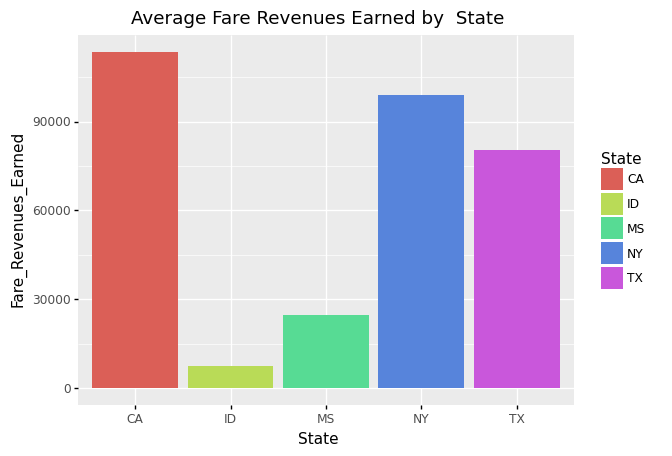

<ggplot: (8766334095662)>

In [82]:
ggplot(per_capita) + geom_col(aes(x='State', y='Fare_Revenues_Earned', fill='State')) + labs(
    title="Average Fare Revenues Earned by  State") + scale_color_grey()